Aufgabe 35.

Der Datensatz Zement enthält Festigkeitswerte (Y) für Zement von drei Zuliefern, der mit einem Additiv versetzt wurde. Zusätzlich wurde die Feuchtigkeit des Zements gemessen.

In [2]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [4]:
df = pd.read_csv('../data/Zement.txt')
df.head()

,Festigkeit,Marke,Additiv,Feuchtigkeit
0,32.6,Grauert,Verstärker,56.4
1,31.5,Grauert,Verstärker,44.1
2,30.0,Grauert,Verstärker,50.0
3,29.8,Grauert,Standard,52.5
4,29.7,Grauert,Verstärker,46.7


In [5]:
df.shape

(30, 4)

In [6]:
df.isna().sum()

Festigkeit      0
Marke           0
Additiv         0
Feuchtigkeit    0
dtype: int64

a) Analysieren Sie explorativ die Verteilungen der Daten, sowohl univariat als auch bivariat bzgl. der Zielgröße. Erwarten Sie signifkante Effekte im linearen Modell?

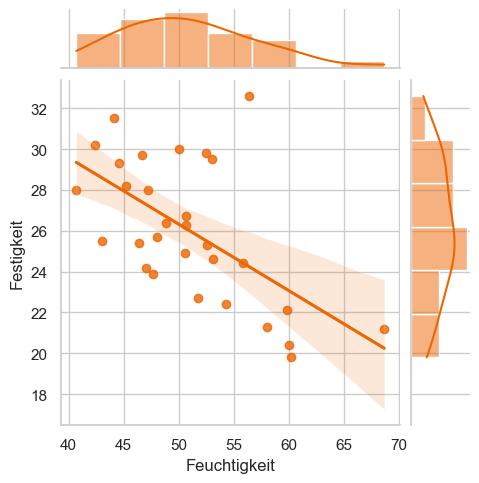

In [7]:
sns.jointplot(x='Feuchtigkeit', y='Festigkeit', data=df, height=5, kind='reg');

> Man sieht es gibt schon einen (ungefähr linearen) Zusammenhang zwischen Festigkeit und Feuchtigkeit.

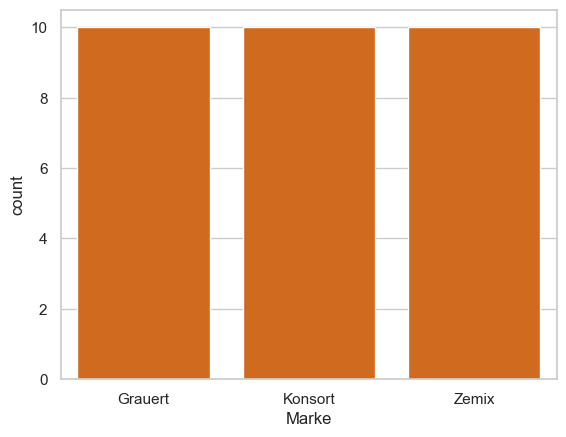

In [8]:
sns.countplot(x='Marke', data=df);

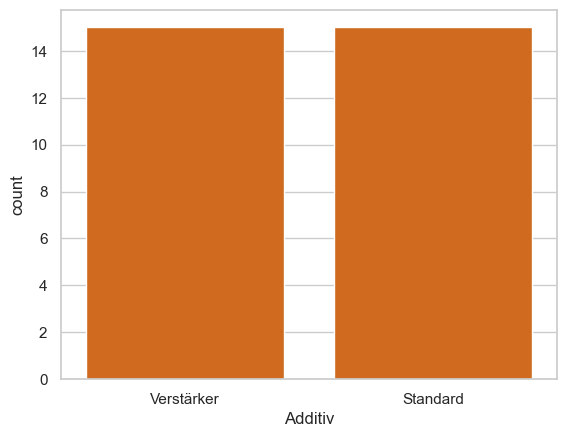

In [9]:
sns.countplot(x='Additiv', data=df);

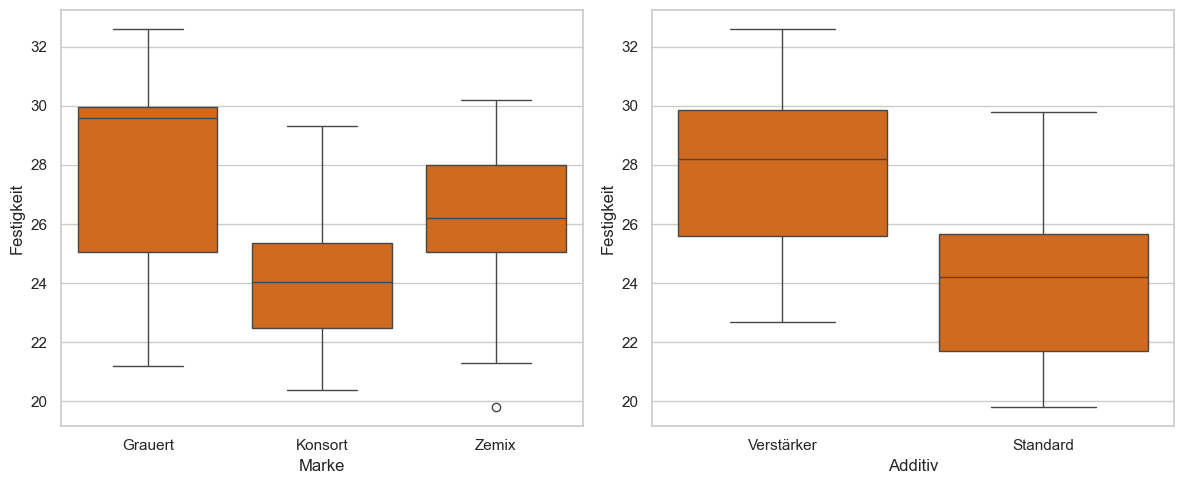

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Marke', y='Festigkeit', data=df, ax=ax[0]);
sns.boxplot(x='Additiv', y='Festigkeit', data=df, ax=ax[1]);
plt.tight_layout()
plt.show()

> Man sieht hier die Festigkeit unterscheidet nicht viel zwischen Marken aber zwischen Additiv schon.

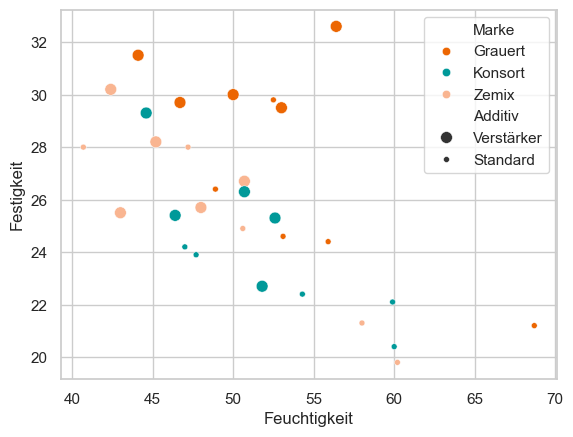

In [11]:
sns.scatterplot(x='Feuchtigkeit', y='Festigkeit', hue='Marke', data=df, size='Additiv');

> Wenn wir hier alle 4 Variablen in einem Plot anschauen, dann alle drei Erkenntnisse die wir vorhin notiert haben nochmal sich bestätigen lassen. Man sieht hier es gibt einen linearen Zusammenhang zwischen Festigkeit und Feuchtigkeit, danach kann man `Verstärker` Additiv von `Standard` gewissermaße unterscheiden. Man kann hier immer noch zwischen Marken nicht unterscheiden.

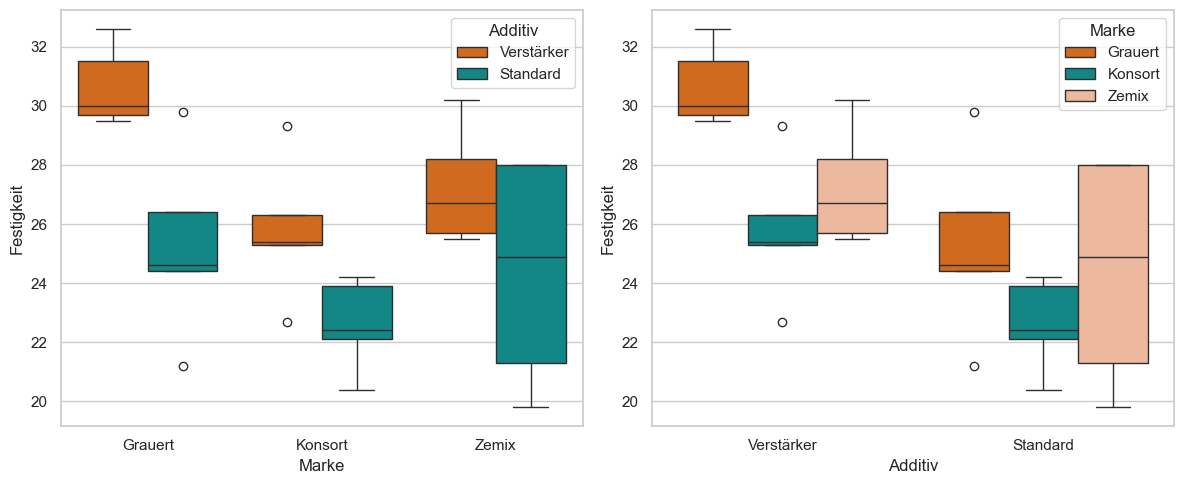

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Marke', y='Festigkeit', data=df, hue='Additiv', ax=ax[0]);
sns.boxplot(x='Additiv', y='Festigkeit', data=df, hue='Marke', ax=ax[1]);
plt.tight_layout()
plt.show()

> Hier fällt keinen Muster auf, wenn man Boxplots von Marken nochmal mit Additiv gegen Festigkeit aufteilt.

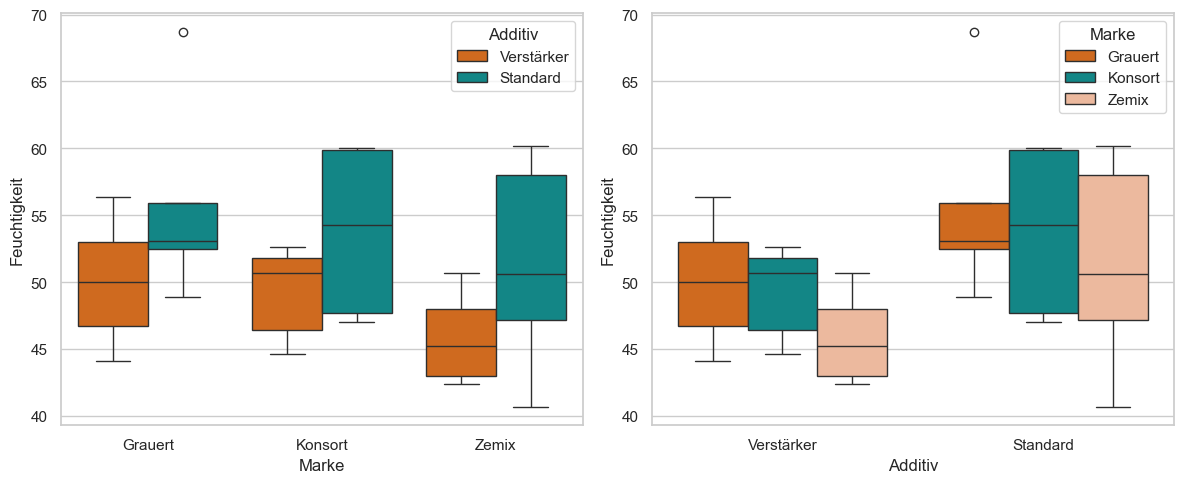

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Marke', y='Feuchtigkeit', data=df, hue='Additiv', ax=ax[0]);
sns.boxplot(x='Additiv', y='Feuchtigkeit', data=df, hue='Marke', ax=ax[1]);
plt.tight_layout()
plt.show()

> Also zusammengefasst von EDA, man sollte schon ein signifikantes Effekt von einem linearen Regression erhalten.

In [14]:
df = pd.get_dummies(df, columns=['Marke', 'Additiv'], dtype=int, drop_first=True)
df.head()

,Festigkeit,Feuchtigkeit,Marke_Konsort,Marke_Zemix,Additiv_Verstärker
0,32.6,56.4,0,0,1
1,31.5,44.1,0,0,1
2,30.0,50.0,0,0,1
3,29.8,52.5,0,0,0
4,29.7,46.7,0,0,1


b) Passen Sie ein Regressionsmodell mit den Faktoren Feuchtigkeit, Zulieferer und Additiv durch.

In [15]:
X = df.drop(columns=['Festigkeit'])
y = df['Festigkeit']
X = add_constant(X)
model = OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Festigkeit   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     19.48
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.17e-07
Time:                        11:03:53   Log-Likelihood:                -57.794
No. Observations:                  30   AIC:                             125.6
Df Residuals:                      25   BIC:                             132.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 42.9316      3

c) Sind die Residuen normalverteilt?

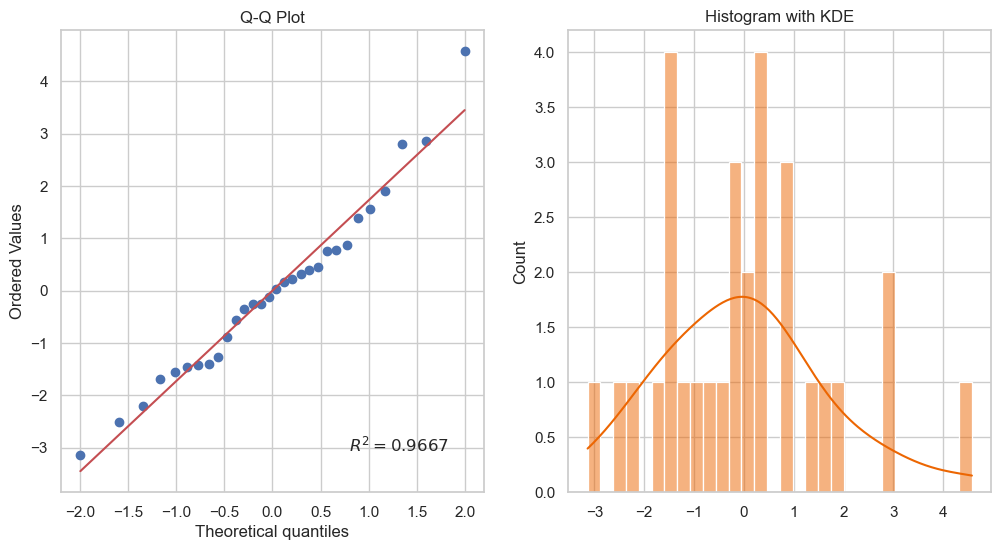

Shapiro-Wilk normality test: p-value = 0.5965693373602134
D'Agostino's K^2 normality test: p-value = 0.2127878323080208
Kolmogorov-Smirnov normality test: p-value = 0.8852397677877631
Anderson-Darling normality test: statistic = 0.2930022379503683, critical value = 0.712


In [16]:
check_normality(result.resid)

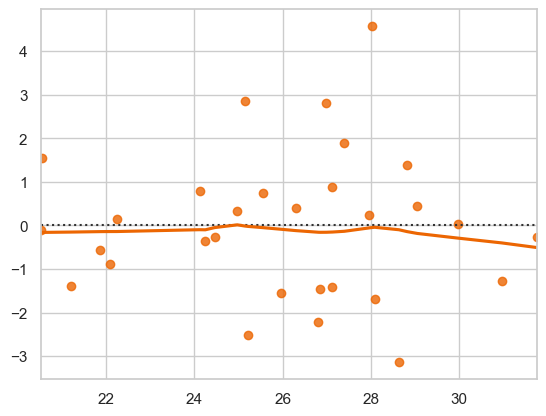

In [17]:
sns.residplot(x=result.fittedvalues, y=result.resid, lowess=True);

Ja, die Residuen sind normalverteilt.

d) Welchen Festigkeitswert erwarten Sie bei einer Lieferung von Grauert mit Verstärker im Gegensatz zu einer Lieferung von Zemix ohne Verstärker, wenn die Feuchtigkeit auf ihren Mittelwert gesetzt wird? Hängt die Differenz der beiden Werte von der Feuchtigkeit ab?

In [18]:
print(f"Wenn Feutigkeit = {df['Feuchtigkeit'].mean().round(2)}")
Verstärker = 1
Zemix = 0
Konsort = 0
Feuchtigkeit = df['Feuchtigkeit'].mean()
print(f"Mit Grauert und Verstärker: {result.predict([1, Feuchtigkeit, Konsort, Zemix, Verstärker]).round(2)}")

Verstärker = 0
Zemix = 1
Konsort = 0
Feuchtigkeit = df['Feuchtigkeit'].mean()
print(f"Mit Zemix und Standard: {result.predict([1, Feuchtigkeit, Konsort, Zemix, Verstärker]).round(2)}")

Wenn Feutigkeit = 51.01
Mit Grauert und Verstärker: [29.66]
Mit Zemix und Standard: [23.99]


In [19]:
Feuchtigkeit = 10
print(f"Wenn Feutigkeit = {Feuchtigkeit}")
Verstärker = 1
Zemix = 0
Konsort = 0
print(f"Mit Grauert und Verstärker: {result.predict([1, Feuchtigkeit, Konsort, Zemix, Verstärker]).round(2)}")

Verstärker = 0
Zemix = 1
Konsort = 0
Feuchtigkeit = 10
print(f"Mit Zemix und Standard: {result.predict([1, Feuchtigkeit, Konsort, Zemix, Verstärker]).round(2)}")

Wenn Feutigkeit = 10
Mit Grauert und Verstärker: [42.11]
Mit Zemix und Standard: [36.44]


Das Differenz zwischen den beiden Fallen bleibt immer ungefähr 6, also hängt nicht von Feuchtigkeit ab.